In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
name = 'StandardNormal'
data = np.load('../data/bias/' + name + '.npz')
eps, b, eevpd = data['stepsize'], data['bias'], np.average(data['eevpd'], axis = -1)

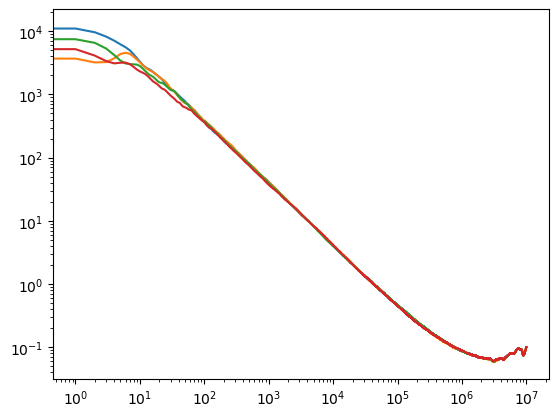

In [4]:
for i in range(4):
    plt.plot(b[0, i, :])

plt.yscale('log')
plt.xscale('log')
plt.show()

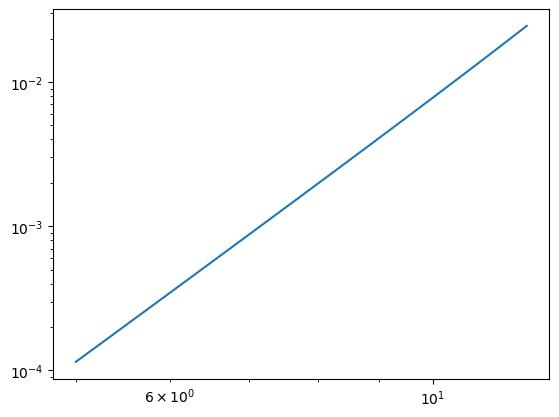

In [26]:
plt.plot(eps, eevpd)

plt.yscale('log')
plt.xscale('log')
plt.show()

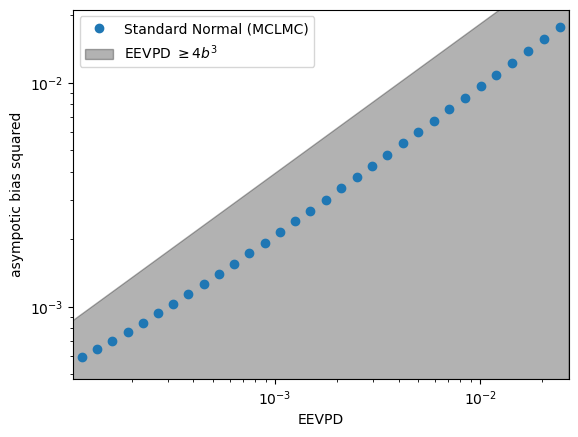

In [25]:
basym = np.average(np.min(b, axis= 2), axis = 1) * 0.01
analytical = lambda E: np.power(0.25 * E, 2./3.)
ymin, ymax = np.min(basym) *  0.8, np.max(basym) * 1.2
xmin, xmax = np.min(eevpd) *  0.9, np.max(eevpd) * 1.1
E = np.logspace(np.log10(xmin), np.log10(xmax), 100)
plt.fill_between(E, np.ones(len(E)) * ymin, analytical(E), alpha = 0.3, color= 'black', label= r'EEVPD $\geq 4 b^3$')
plt.plot(eevpd, basym, 'o', label= 'Standard Normal (MCLMC)')
plt.xscale('log')
plt.yscale('log')
plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)
plt.xlabel('EEVPD')
plt.ylabel('asympotic bias squared')
plt.legend()
plt.show()